In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium as fol

In [2]:
# Load the dataset
df = pd.read_csv("data/meteorite-landings.csv")

# TO DO 1: Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# TO DO 2: Get general information about the dataset
print("\nDataset info:")
print(df.info())

# TO DO 3: Get a statistical summary of the numerical data
print("\nStatistical summary of the dataset:")
print(df.describe())

# TO DO 4: Extract key insights from the data
print("\nKey meteorite information:")
print("Heaviest meteor (g):", df["mass"].max())
print("Oldest meteor:", df["year"].min())
print("Number of unique meteor classes:", df["recclass"].nunique())
print("Number of falls vs finds:")
print(df["fall"].value_counts())

First 5 rows of the dataset:
       name   id nametype     recclass      mass  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong               GeoLocation  
0    6.08333     (50.775000, 6.083330)  
1   10.23333    (56.183330, 10.233330)  
2 -113.00000  (54.216670, -113.000000)  
3  -99.90000   (16.883330, -99.900000)  
4  -64.95000  (-33.166670, -64.950000)  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           

In [3]:
# TO DO 1: Drop rows with missing values in the 'mass' column
df = df.dropna(subset=["mass"])

# Convert mass from grams to kilograms and create a new column
df["mass (kg)"] = df["mass"] / 1000
print("\nUpdated mass information (first 5 rows):")
print(df[["name", "mass", "mass (kg)"]].head())

# Save the updated data to a new CSV file
df.to_csv("data/updated_meteorite-landings.csv", index=False)


Updated mass information (first 5 rows):
       name      mass  mass (kg)
0    Aachen      21.0      0.021
1    Aarhus     720.0      0.720
2      Abee  107000.0    107.000
3  Acapulco    1914.0      1.914
4   Achiras     780.0      0.780


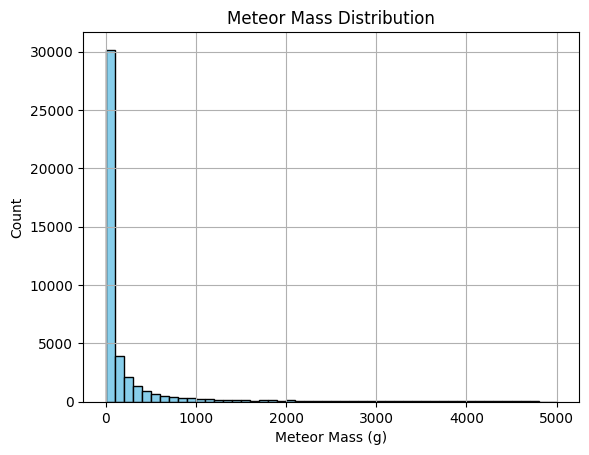


Heavy meteors:
                  name        mass    year
5329   Campo del Cielo  50000000.0  1575.0
5336         Cape York  58200000.0  1818.0
16383             Hoba  60000000.0  1920.0


In [4]:
# TO DO 1: Plot a histogram for masses less than 5000g
plt.hist(df["mass"][df["mass"] < 5000].dropna(), bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Meteor Mass (g)")
plt.ylabel("Count")
plt.title("Meteor Mass Distribution")
plt.grid(True)
plt.show()

# TO DO 2: Filter for meteors heavier than 40,000,000g
heavy_meteors = df[df["mass"] > 40000000]
print("\nHeavy meteors:")
print(heavy_meteors[["name", "mass", "year"]].head())

In [5]:
# --- Geospatial Visualization ---
# Prepare the data for map visualization
df_geo = df.dropna(subset=["reclat", "reclong"]).copy()
df_geo.loc[:, "reclat"] = pd.to_numeric(df_geo["reclat"], errors="coerce")
df_geo.loc[:, "reclong"] = pd.to_numeric(df_geo["reclong"], errors="coerce")
df_geo = df_geo.dropna(subset=["reclat", "reclong"])
df_geo = df_geo.sort_values(by="mass", ascending=False).head(5000)

# Create the map object
map = fol.Map(location=[0, 0], zoom_start=2)

# Add a marker for each meteorite on the map
for index, row in df_geo.iterrows():
    year = int(row['year']) if pd.notnull(row["year"]) else "Unknown"
    popup_text = f"{year}-{row['name']}-{row['mass']:.2f}"
    
    radius = max(2, min(row["mass (kg)"] / 5000, 15))
    fol.CircleMarker(location=[row["reclat"], row["reclong"]],
                     radius=radius,
                     popup=popup_text,
                     color="crimson",
                     fill=True,
                     fill_opacity=0.7
                     ).add_to(map)

# Save the map as an HTML file
map.save("meteor_map.html")
print("\nMap successfully created and saved as 'meteor_map.html'.")


Map successfully created and saved as 'meteor_map.html'.
